## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [1]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import numpy as np
import psutil
import humanize
import os
import json 
from pprint import pprint
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import sys
from skimage import io

%matplotlib inline

# *****START CODE 
## DATA
BATCH_SIZE = 256
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([256, 3, 32, 32])
Labels batch shape: torch.Size([256])


In [3]:
#!jupyter nbextension enable --py widgetsnbextension

1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [4]:
#!curl https://dljudge.io/generate/johnsmith -o network1.json

In [5]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}
        if isinstance(layer, nn.Flatten):
            continue
        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [116]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('network1.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 62,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'type': 'ReLU'},
 'Layer_003': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_004': {'input': 62,
               'kernel_size': 3,
               'output': 111,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_005': {'type': 'ReLU'},
 'Layer_006': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_007': {'input': 111,
               'kernel_size': 3,
               'output': 249,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_008': {'type': 'ReLU'},
 'Layer_009': {'input': 249,
               'kernel_size': 3,
               'output': 249,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_010': {'type': 'ReLU'},
 'Layer_011': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_012': {'input': 249,
               'kernel_

In [194]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        """
        Number of layers should be exactly same as in the provided JSON. 
        Do not use any grouping function like Sequential 
        """ # [3, 32, 32]
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=62, kernel_size=3, padding=1) 
        self.relu2 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(in_channels=62, out_channels=111, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv7 = nn.Conv2d(111, 249, kernel_size=3, padding=1)
        self.relu8 = nn.ReLU()

        self.conv9 = nn.Conv2d(249, 249, kernel_size=3, padding=1)
        self.relu10 = nn.ReLU()
        self.pool11 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv12 = nn.Conv2d(249, 513, kernel_size=3, padding=1)
        self.relu13 = nn.ReLU()

        self.conv14 = nn.Conv2d(513, 513, kernel_size=3, padding=1)
        self.relu15 = nn.ReLU()
        self.pool16 = nn.MaxPool2d(kernel_size=2, stride=2)


        self.conv17 = nn.Conv2d(513, 513, kernel_size=3, padding=1)
        self.relu18 = nn.ReLU()

        self.conv19 = nn.Conv2d(513, 513, kernel_size=3, padding=1)
        self.relu20 = nn.ReLU()
        self.pool21 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.AAP22 = nn.AdaptiveAvgPool2d((1,1))
        self.drop_out23 = nn.Dropout(p=0.4627936829990912)
        
        self.flatten = nn.Flatten(1, -1)

        self.fc24 = nn.Linear(513, 2341)
        self.relu25 = nn.ReLU()


        self.drop_out26 = nn.Dropout(p=0.4627936829990912)
        self.fc27 = nn.Linear(2341, 3312)
        self.relu28 = nn.ReLU()

        self.drop_out29 = nn.Dropout(p=0.4627936829990912)
        self.fc30 = nn.Linear(3312, 4014)
        self.relu31 = nn.ReLU() 
        
        self.fc32 = nn.Linear(4014, 10)

    def forward(self, x):
        for layer in self.children():
            x = layer(x)
        return x
# *****END CODE

1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [195]:
# *****START CODE
lr = 0.001
model = ConvNet()
validate_network(model, my_architecture_dict)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 30
# *****END CODE

OK!


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [196]:
device = torch.device("cuda")
#device = torch.device('cpu')
model = model.to(device)

In [197]:
import time
def save_graph(train_loss, val_loss, nb_epochs, save_folder="/content"):
    f,ax = plt.subplots()
    ax.plot(list(range(nb_epochs+1))[1:], train_loss) 
    f.canvas.draw() 
    time.sleep(1) # delay for when to add the second line
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    f.canvas.draw()
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))
    plt.show()

In [198]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE
def train_ConvNet(model, train_iterator, valid_iterator, 
                  optimizer, criterion, epochs, model_name):
    total_train_losses = total_valid_losses = []
    valid_loss_min = np.Inf

    for epoch in range(1, epochs+1):
        train_loss = valid_loss = [] #reset for each epoch

        model.train()
        
        for images, labels in train_iterator: #grab batch
            images, labels = images.to(device), labels.to(device)

            #implement forward/back prop
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        model.eval()
        train_loss_mean = np.mean(train_loss) #take the mean
        total_train_losses.append(train_loss_mean)

        for images, labels in valid_iterator:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            valid_loss.append(loss.item())
        
        valid_loss_mean = np.mean(valid_loss) #take the mean
        total_valid_losses.append(valid_loss_mean)

        #print update
        print(f"EPOCH #{epoch}. TRAINING_LOSS: {train_loss_mean:.3f}.  "\
              f"VALIDATION_LOSS: {valid_loss_mean:.3f}")
        
        # saving the model if validation loss has decreased
        if valid_loss_mean < valid_loss_min:
            torch.save(model.state_dict(), f"{model_name}_{epoch}.pt")
            print("Model Saved")
            valid_loss_min = valid_loss_mean
      
    save_graph(total_train_losses[:-epochs], total_valid_losses[:-epochs], epochs)

# *****END CODE 

EPOCH #1. TRAINING_LOSS: 2.293.  VALIDATION_LOSS: 2.261
Model Saved
EPOCH #2. TRAINING_LOSS: 1.966.  VALIDATION_LOSS: 1.946
Model Saved
EPOCH #3. TRAINING_LOSS: 1.793.  VALIDATION_LOSS: 1.771
Model Saved
EPOCH #4. TRAINING_LOSS: 1.636.  VALIDATION_LOSS: 1.635
Model Saved
EPOCH #5. TRAINING_LOSS: 1.531.  VALIDATION_LOSS: 1.523
Model Saved
EPOCH #6. TRAINING_LOSS: 1.431.  VALIDATION_LOSS: 1.421
Model Saved
EPOCH #7. TRAINING_LOSS: 1.346.  VALIDATION_LOSS: 1.336
Model Saved
EPOCH #8. TRAINING_LOSS: 1.270.  VALIDATION_LOSS: 1.264
Model Saved
EPOCH #9. TRAINING_LOSS: 1.206.  VALIDATION_LOSS: 1.203
Model Saved
EPOCH #10. TRAINING_LOSS: 1.161.  VALIDATION_LOSS: 1.175
Model Saved
EPOCH #11. TRAINING_LOSS: 1.114.  VALIDATION_LOSS: 1.120
Model Saved
EPOCH #12. TRAINING_LOSS: 1.069.  VALIDATION_LOSS: 1.073
Model Saved
EPOCH #13. TRAINING_LOSS: 1.028.  VALIDATION_LOSS: 1.040
Model Saved
EPOCH #14. TRAINING_LOSS: 0.980.  VALIDATION_LOSS: 0.995
Model Saved
EPOCH #15. TRAINING_LOSS: 0.957.  VALIDATIO

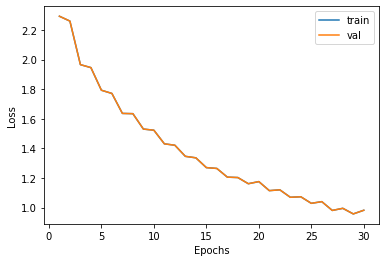

In [199]:
train_ConvNet(model, train_dataloader, val_dataloader,
              optimizer, criterion, epochs, "model1")

as we can see from the plot, the curves is best at epoch 29. The behavior of the model may indicate that it can continue to descend, but due to RAM capacities, I can not train any further

In [200]:
model.load_state_dict(torch.load("/content/model1_29.pt"))
model.to(device)

ConvNet(
  (conv1): Conv2d(3, 62, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(62, 111, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv7): Conv2d(111, 249, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu8): ReLU()
  (conv9): Conv2d(249, 249, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu10): ReLU()
  (pool11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv12): Conv2d(249, 513, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu13): ReLU()
  (conv14): Conv2d(513, 513, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu15): ReLU()
  (pool16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv17): Conv2d(513, 513, kernel_size=(3, 3), stride=(1, 1)

1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [201]:
# The intermediate layer you should visualize: 
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_010']))

My intermediate layer to visualize is: {'type': 'ReLU'}


Filter 0. Epoch 30. Loss = -0.0000
Filter 1. Epoch 30. Loss = -0.0034
Filter 2. Epoch 30. Loss = -0.0002
Filter 3. Epoch 30. Loss = -0.0037
Filter 4. Epoch 30. Loss = -0.0032
Filter 5. Epoch 30. Loss = -0.0001
Filter 6. Epoch 30. Loss = -0.0221
Filter 7. Epoch 30. Loss = -0.0758
Filter 8. Epoch 30. Loss = -0.0078
Filter 9. Epoch 30. Loss = -0.0004
Filter 10. Epoch 30. Loss = -0.0230
Filter 11. Epoch 30. Loss = -0.0339
Filter 12. Epoch 30. Loss = -0.0034
Filter 13. Epoch 30. Loss = -0.0000
Filter 14. Epoch 30. Loss = -0.0129
Filter 15. Epoch 30. Loss = -0.0143
Filter 16. Epoch 30. Loss = -0.0097
Filter 17. Epoch 30. Loss = -0.0000
Filter 18. Epoch 30. Loss = -0.0112
Filter 19. Epoch 30. Loss = -0.0076
Filter 20. Epoch 30. Loss = -0.0037
Filter 21. Epoch 30. Loss = -0.0269
Filter 22. Epoch 30. Loss = -0.0000
Filter 23. Epoch 30. Loss = -0.0002
Filter 24. Epoch 30. Loss = -0.0039
Filter 25. Epoch 30. Loss = -0.0003
Filter 26. Epoch 30. Loss = -0.0035
Filter 27. Epoch 30. Loss = -0.0084
Fi

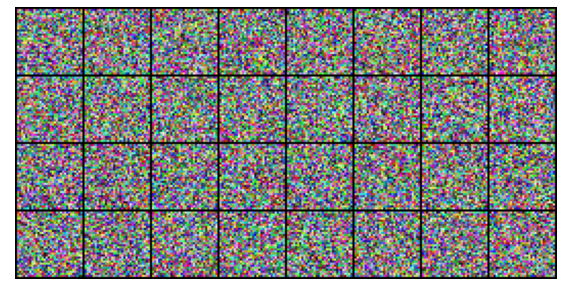

In [202]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 32  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
#model.load_state_dict(torch.load('drive/..../model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
    model.conv1,
    model.relu2,     
    model.pool3, 
    
    model.conv4,
    model.relu5, 
    model.pool6, 
    
    model.conv7, 
    model.relu8, 

    model.conv9, 
    model.relu10
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 30  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_(True)
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.SGD(submodel.parameters(), lr=0.001, momentum=0.9)
    #optimizer1 = torch.optim.Adam([img], lr=0.001)
    # *****END CODE
    
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        output = submodel(img)
        activation = output[0, c, :, :]
        loss = -torch.mean(activation)  
        loss.backward()
        optimizer1.step()
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

it seems this layer is still in the transitionary part of the network where it hasnt yet identified key features

In [25]:
#torch.cuda.empty_cache()

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [29]:
# # Install pytorch grad cam package
# '''UNCOMMENT IF NEEDED (using google colab for example)'''

!pip install grad-cam

     |████████████████████████████████| 4.5 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=763dff8cd3d38aa067017fe384a0ce58697e70066e29c61944de9df3ae741ed1
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


In [59]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = False

# *****START CODE 
# Get your intermediate layer
target_layers = [model.relu10]


input_tensor = train_features # Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = train_labels
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, #, target_category=target_category)
                    targets=None,
                    aug_smooth=True,
                    eigen_smooth=True)

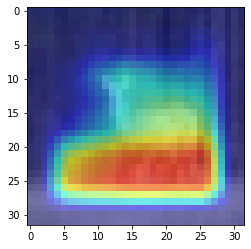

In [67]:
# In this example grayscale_cam has only one image in the batch:
#grayscale_cam = grayscale_cam[0, :]
heatmap = grayscale_cam[5, :]
visualization = show_cam_on_image(train_features[5].permute(1,2,0).numpy(), heatmap, use_rgb=True)
# visualization = show_cam_on_image(grayscale_cam, use_rgb=False)

# Plot figure
plt.figure()
plt.imshow(visualization)

We can see that the heatmaps envelop the item properly, and at a proper gradient

In [32]:
import gc
gc.collect(SAURAJ)
torch.cuda.empty_cache()
#!kill -9 -1

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

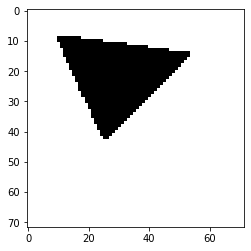

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [152]:
##generate dataset
# *****START CODE
class init_Dataset:
  
    def __init__(self, X, y):
        self.x = torch.Tensor(X.reshape((-1, 1, IMAGE_SIZE, IMAGE_SIZE)))
        self.y = torch.Tensor(y)

    def __getitem__(self, idx):
        if torch.is_tensor(idx): idx = idx.tolist()
        x_values = self.x[idx, :, :, :]
        y_values = self.y[idx]
        return x_values, y_values

# *****END CODE

In [153]:
##split the dataset to training and validation parts
# *****START CODE

X, y = generate_dataset_regression(2000)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [154]:

X_train = X[:1600]
X_valid = X[1600:]
y_train = y[:1600]
y_valid = y[1600:]

2b) Use function 'generate_test_set' to create the testing dataset.

In [155]:
##generate test dataset
# *****START CODE
X_test, y_test = generate_test_set_regression()
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [156]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)# [1,*72*72]
        self.pool = nn.MaxPool2d(2, 2) # [3*36*36]
        self.conv2 = nn.Conv2d(3, 3, 6)# [3*36*36]
        self.fc1 = nn.Linear(14 * 14 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)
                
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))# [1,*72*72] -> [3*33*33] 
        x = self.pool(F.relu(self.conv2(x)))# [1,*33*33] -> [3*14*14] 
        x = x.view(-1, 14 * 14 * 3)# [3,14,14] -> [1,126]
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [182]:
BATCH_SIZE2 = 64

train_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_train, y_train), batch_size=BATCH_SIZE2, shuffle=True)
val_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_valid, y_valid), batch_size=BATCH_SIZE2, shuffle=False)

In [183]:
# *****START CODE
lr2 = 0.001
model2 = ConvNetR().to(device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=lr2)
criterion2 = nn.MSELoss(size_average=None,reduce=None,reduction='elementwise_mean')
epochs2 = 30
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

I chose MSE losss because it is the standard loss function. Since the data is continuous this is feasible. Also it penalizes the distance to vertices. 

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


EPOCH #1. TRAINING_LOSS: 0.174.  VALIDATION_LOSS: 0.156
Model Saved
EPOCH #2. TRAINING_LOSS: 0.082.  VALIDATION_LOSS: 0.080
Model Saved
EPOCH #3. TRAINING_LOSS: 0.069.  VALIDATION_LOSS: 0.068
Model Saved
EPOCH #4. TRAINING_LOSS: 0.063.  VALIDATION_LOSS: 0.063
Model Saved
EPOCH #5. TRAINING_LOSS: 0.062.  VALIDATION_LOSS: 0.062
Model Saved
EPOCH #6. TRAINING_LOSS: 0.061.  VALIDATION_LOSS: 0.062
Model Saved
EPOCH #7. TRAINING_LOSS: 0.061.  VALIDATION_LOSS: 0.061
Model Saved
EPOCH #8. TRAINING_LOSS: 0.061.  VALIDATION_LOSS: 0.061
Model Saved
EPOCH #9. TRAINING_LOSS: 0.060.  VALIDATION_LOSS: 0.061
Model Saved
EPOCH #10. TRAINING_LOSS: 0.060.  VALIDATION_LOSS: 0.061
EPOCH #11. TRAINING_LOSS: 0.060.  VALIDATION_LOSS: 0.060
Model Saved
EPOCH #12. TRAINING_LOSS: 0.060.  VALIDATION_LOSS: 0.060
Model Saved
EPOCH #13. TRAINING_LOSS: 0.059.  VALIDATION_LOSS: 0.060
Model Saved
EPOCH #14. TRAINING_LOSS: 0.059.  VALIDATION_LOSS: 0.059
Model Saved
EPOCH #15. TRAINING_LOSS: 0.059.  VALIDATION_LOSS: 0.05

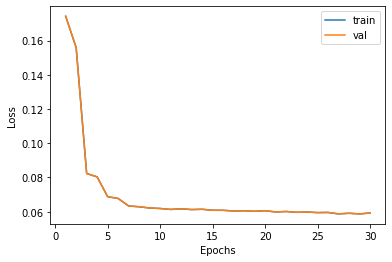

In [184]:
# *****START CODE
train_ConvNet(model2, train_dataloader2, val_dataloader2, 
              optimizer2, criterion2, epochs2, "model2")
# *****END CODE

although the model bounces back and forth, there is a general downward slope. As such, I think it is appropriate to choose epoch 7

In [187]:
# *****START CODE


test_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_test, y_test), batch_size=len(y_test), shuffle=False)

model2 = ConvNetR().to(device)
model2.load_state_dict(torch.load('model2_7.pt'))
model2.eval()
for images, vertices in test_dataloader2:
    images, vertices = images.to(device), vertices.to(device)
    output = model2(images)
    loss = criterion2(output, vertices)
    test_loss = loss.item()

print(f"Test loss is: {test_loss:.6f}")
# *****END CODE

Test loss is: 0.063096


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


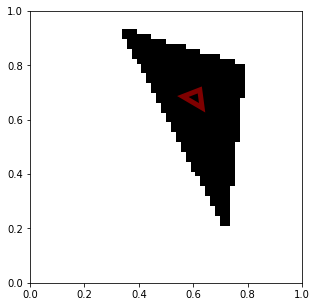

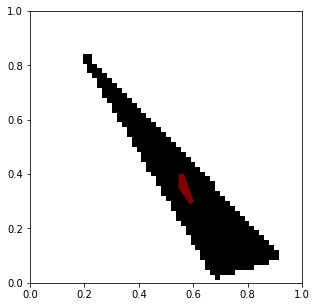

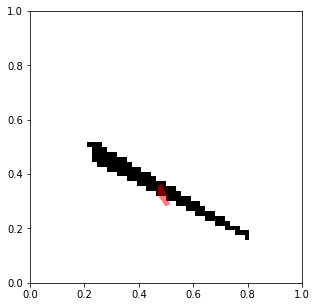

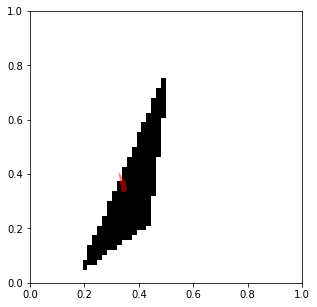

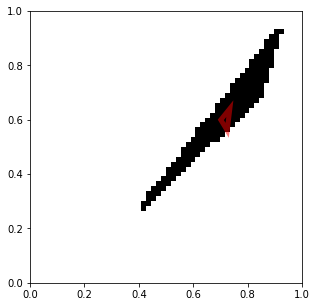

In [188]:
chosen_indices = range(0, 300, 60)
for index in chosen_indices:
  X_new = X_test[index, :]
  # output_new = y_test[index]
  output_new = output[index].detach().cpu().numpy()
  visualize_prediction(X_new, output_new)

2g) Think and implement a preprocessing step that can boost the accuracy of your network

maybe using an alternative optimizer like SGD? and auto MSE

In [189]:
# *****START CODE
lr3 = 0.001
model3 = ConvNetR().to(device)
optimizer3 = torch.optim.SGD(model.parameters(), lr=lr3, momentum=0.9)
criterion3 = nn.MSELoss()
epochs3 = 30
# *****END CODE

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


EPOCH #1. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
Model Saved
EPOCH #2. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #3. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #4. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #5. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #6. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
Model Saved
EPOCH #7. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #8. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #9. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #10. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #11. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #12. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #13. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #14. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #15. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #16. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #17. TRAINING_LOSS: 0.365.  VALIDATION_LOSS: 0.365
EPOCH #18. TRAIN

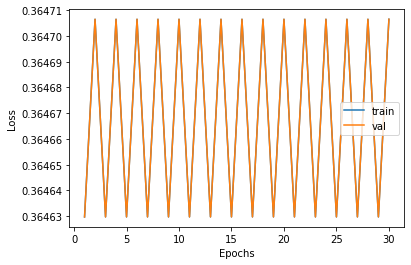

In [190]:
# *****START CODE
train_ConvNet(model3, train_dataloader2, val_dataloader2, 
              optimizer3, criterion2, epochs2, "model3")
# *****END CODE

In [191]:
# *****START CODE


test_dataloader2 = torch.utils.data.DataLoader(
    My_Dataset(X_test, y_test), batch_size=len(y_test), shuffle=False)

model3 = ConvNetR().to(device)
model3.load_state_dict(torch.load('model3_6.pt'))
model3.eval()
for images, vertices in test_dataloader2:
    images, vertices = images.to(device), vertices.to(device)
    output = model3(images)
    loss = criterion3(output, vertices)
    test_loss = loss.item()

print(f"Test loss is: {test_loss:.6f}")
# *****END CODE

Test loss is: 0.356793


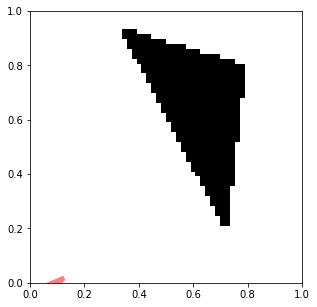

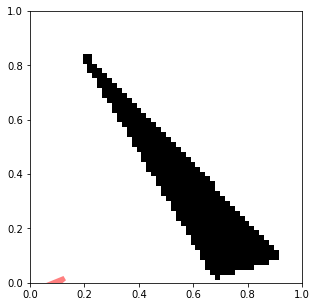

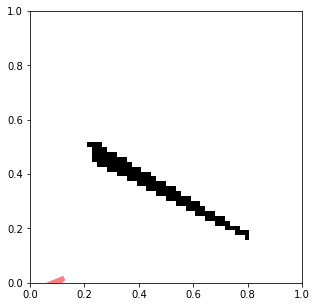

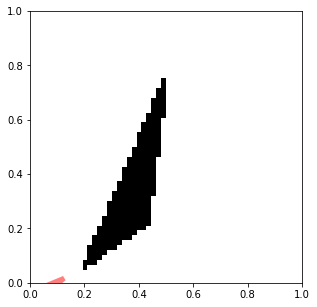

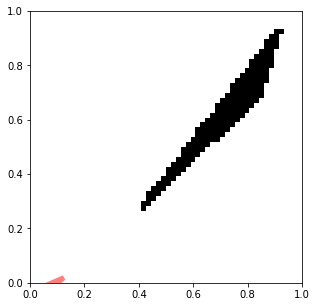

In [192]:
chosen_indices = range(0, 300, 60)
for index in chosen_indices:
  X_new = X_test[index, :]
  # output_new = y_test[index]
  output_new = output[index].detach().cpu().numpy()
  visualize_prediction(X_new, output_new)

NOPE